In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("G:\Python Practice\Settyl\WeatherEvents_Jan2016-Dec2020.csv")

In [3]:
df.isnull().sum()

EventId               0
Type                  0
Severity              0
StartTime(UTC)        0
EndTime(UTC)          0
TimeZone              0
AirportCode           0
LocationLat           0
LocationLng           0
City              11683
County                0
State                 0
ZipCode           48637
dtype: int64

In [6]:
df.head()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
1,W-2,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
2,W-3,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
3,W-4,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
4,W-5,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0


In [7]:
df = df.fillna(df.median())

In [8]:
df.isnull().sum()

EventId               0
Type                  0
Severity              0
StartTime(UTC)        0
EndTime(UTC)          0
TimeZone              0
AirportCode           0
LocationLat           0
LocationLng           0
City              11683
County                0
State                 0
ZipCode               0
dtype: int64

In [9]:
df['City'].value_counts()

Jacksonville          25797
Columbus              25409
Cleveland             23787
Washington            21944
Greenville            21814
                      ...  
Jordan Valley            48
Campo                    43
Hanksville               27
Colville                 25
South Padre Island        8
Name: City, Length: 1716, dtype: int64

In [10]:
l = ['Jacksonville','Columbus']
import random
df = df.fillna(random.choice(l))

In [11]:
df.isnull().sum()

EventId           0
Type              0
Severity          0
StartTime(UTC)    0
EndTime(UTC)      0
TimeZone          0
AirportCode       0
LocationLat       0
LocationLng       0
City              0
County            0
State             0
ZipCode           0
dtype: int64

In [12]:
table1 = df.groupby(['City','Type']).count().reset_index()

### Here we are creating a dictionary where we are taking each city and recording all the types of weathers corresponding to each city

In [14]:
list_of_dic = []
label = table1.City[0]
list_value = {}
for index, row in table1.iterrows():
    if row['City'] != label:
        label = row['City']
        list_of_dic.append(list_value)
        list_value = {}
        list_value['City'] = row['City']
        list_value[row['Type']] = row['EventId']
        
    else:
        list_value['City'] = row['City']
        list_value[row['Type']] = row['EventId']

In [15]:
list_of_dic

[{'City': 'Abbeville',
  'Cold': 27,
  'Fog': 1137,
  'Precipitation': 76,
  'Rain': 2879,
  'Snow': 9,
  'Storm': 3},
 {'City': 'Aberdeen',
  'Cold': 991,
  'Fog': 3618,
  'Precipitation': 145,
  'Rain': 4768,
  'Snow': 779,
  'Storm': 40},
 {'City': 'Aberdeen Proving Ground',
  'Cold': 99,
  'Fog': 650,
  'Hail': 6,
  'Precipitation': 12,
  'Rain': 1735,
  'Snow': 84,
  'Storm': 1},
 {'City': 'Abilene',
  'Cold': 80,
  'Fog': 283,
  'Hail': 4,
  'Precipitation': 61,
  'Rain': 1314,
  'Snow': 69,
  'Storm': 18},
 {'City': 'Abingdon',
  'Cold': 10,
  'Fog': 394,
  'Precipitation': 48,
  'Rain': 3662,
  'Snow': 474},
 {'City': 'Accident', 'Cold': 52, 'Fog': 1048},
 {'City': 'Ada',
  'Cold': 29,
  'Fog': 433,
  'Precipitation': 76,
  'Rain': 2229,
  'Snow': 65},
 {'City': 'Addison',
  'Cold': 68,
  'Fog': 235,
  'Precipitation': 19,
  'Rain': 1100,
  'Snow': 9,
  'Storm': 20},
 {'City': 'Adrian',
  'Cold': 7,
  'Fog': 448,
  'Precipitation': 27,
  'Rain': 1843,
  'Snow': 675},
 {'City': 

In [16]:
data = pd.DataFrame()
for dic in list_of_dic:
    data = data.append(dic, ignore_index=True)

In [17]:
data.isnull().sum()

City                0
Cold                3
Fog                49
Precipitation     146
Rain               61
Snow              185
Storm             325
Hail             1395
dtype: int64

In [18]:
data = data.fillna(0)

In [19]:
df = df.merge(data,on='City')

In [21]:
df['StartTime(UTC)'] = pd.to_datetime(df['StartTime(UTC)'])
df['EndTime(UTC)'] = pd.to_datetime(df['EndTime(UTC)'])

df['Start_year'] = df['StartTime(UTC)'].dt.year
df['Start_month'] = df['StartTime(UTC)'].dt.month
df['Start_week'] = df['StartTime(UTC)'].dt.week
df['Start_weekday'] = df['StartTime(UTC)'].dt.weekday
df['Start_day'] = df['StartTime(UTC)'].dt.day

df['end_year'] = df['EndTime(UTC)'].dt.year
df['end_month'] = df['EndTime(UTC)'].dt.month
df['end_week'] = df['EndTime(UTC)'].dt.week
df['end_weekday'] = df['EndTime(UTC)'].dt.weekday
df['end_day'] = df['EndTime(UTC)'].dt.day

G:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  
G:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if sys.path[0] == '':


In [34]:
X = df.drop(['Type','StartTime(UTC)','EndTime(UTC)'],axis=1).head(600000)
y = df.Type.head(600000)

In [37]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for name in X.columns:
    if X[name].dtype == 'O':
        print(name)
        X[name] = X[name].astype(str)
        le.fit(X[name])
        X[name] = le.transform(X[name])

EventId
Severity
TimeZone
AirportCode
City
County
State


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=40)

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
clf = RandomForestClassifier(n_estimators = 400,min_samples_split = 2,min_samples_leaf = 1,max_features= 'sqrt',max_depth =None,bootstrap= False)


In [41]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_features='sqrt', n_estimators=400)

In [42]:
predictions = clf.predict(X_test)

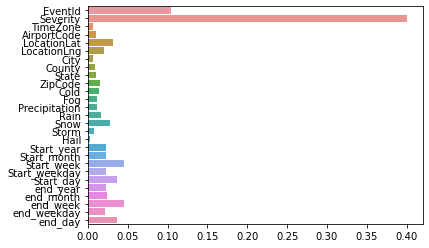

In [43]:
ax = sns.barplot(x=clf.feature_importances_, y=X.columns)

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(predictions,y_test)

0.9248888888888889

In [98]:
predictions = pd.DataFrame(predictions).reset_index(drop=True)
y_test = pd.DataFrame(y_test).reset_index(drop=True)
X_test = pd.DataFrame(X_test).reset_index(drop=True)

In [116]:
predictions.rename(columns={0:'Predictions'}, inplace=True )

In [118]:
output = pd.concat([X_test,y_test,predictions],axis=1)

In [119]:
output

,EventId,Severity,TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode,...,Start_week,Start_weekday,Start_day,end_year,end_month,end_week,end_weekday,end_day,Type,Predictions
0,382781,4,1,123,37.3262,-79.2028,81,16,38,24502.0,...,36,3,7,2017,9,36,3,7,Fog,Fog
1,371937,2,0,108,33.9020,-87.3140,67,149,0,35503.0,...,18,0,30,2018,4,18,0,30,Fog,Fog
2,502048,2,1,151,42.2706,-71.8731,143,159,14,1602.0,...,40,6,9,2016,10,40,6,9,Rain,Rain
3,332145,1,1,87,39.3612,-84.5206,46,14,28,45014.0,...,37,0,10,2018,9,37,0,10,Rain,Rain
4,76784,2,0,166,39.0136,-87.6485,99,31,10,62451.0,...,17,5,29,2017,4,17,5,29,Rain,Rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,450281,0,1,135,42.6046,-82.8353,58,81,17,48045.0,...,32,5,13,2016,8,32,5,13,Rain,Rain
179996,597766,1,0,24,45.8680,-95.3940,4,41,18,56308.0,...,26,0,24,2019,6,26,0,24,Rain,Rain
179997,68515,1,0,101,39.7740,-90.2419,64,89,10,62650.0,...,7,5,17,2018,2,7,5,17,Rain,Rain
179998,469256,2,1,68,35.1314,-78.9316,47,33,21,28311.0,...,15,3,9,2020,4,15,3,9,Rain,Rain


In [120]:
output.to_excel('WeatherForecasting.xlsx',index=False)

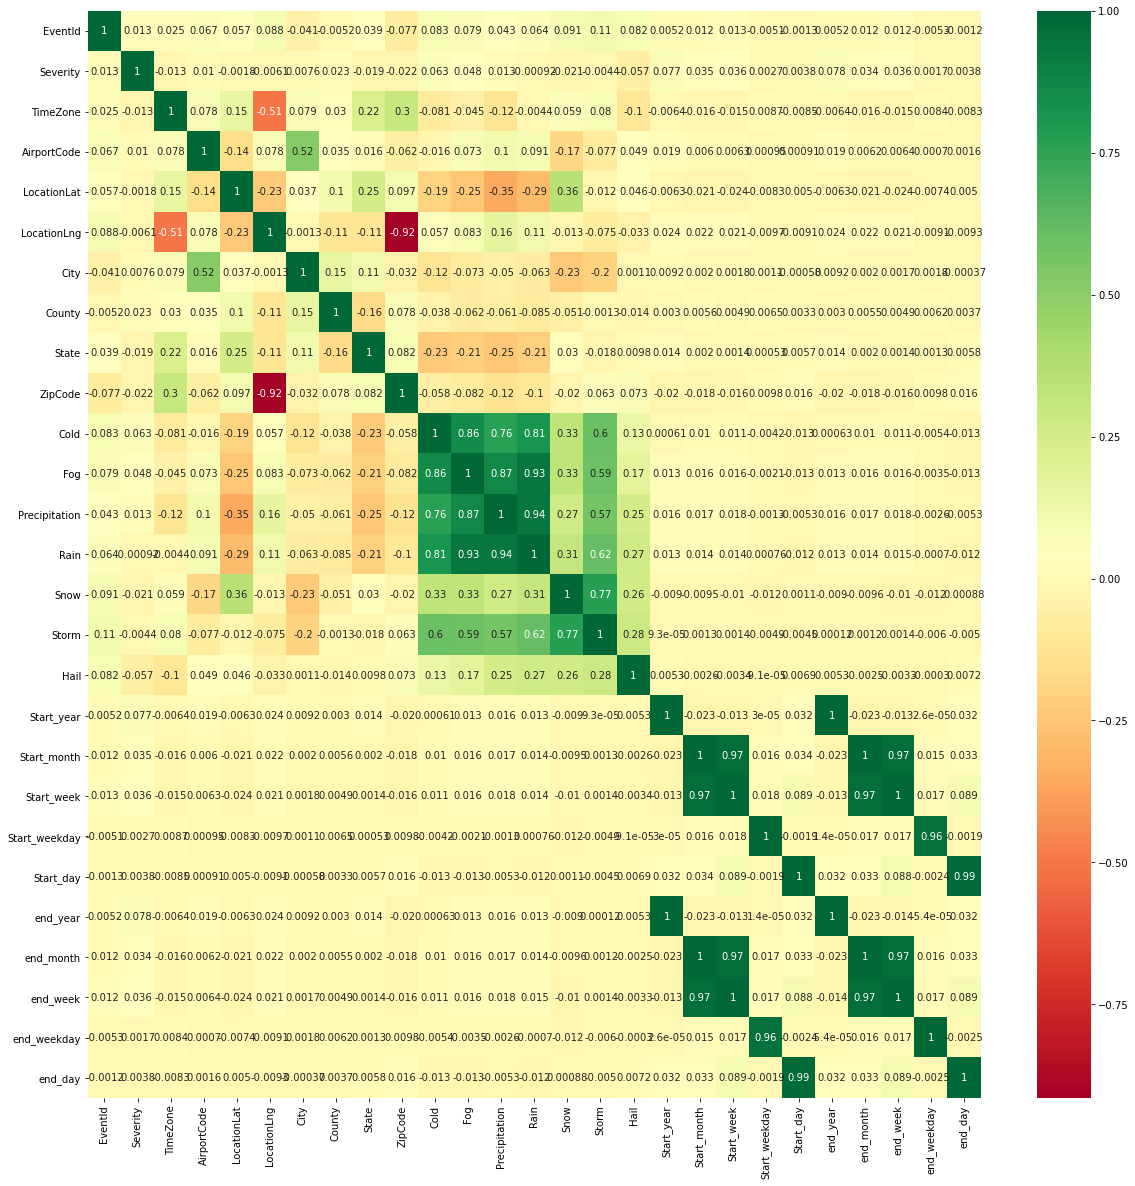

In [137]:
corrmat = output.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(output[top_corr_features].corr(),annot=True,cmap="RdYlGn")